In [ ]:
pip install python-telegram-bot==13.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import spacy
import numpy as np

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import telegram
from telegram.ext import Updater , CommandHandler
from telegram.ext import Filters
from telegram.ext import MessageHandler

In [ ]:
!cp /content/drive/MyDrive/6107/task_chatbot.py /content

In [ ]:
import task_chatbot

In [ ]:
from re import search

In [ ]:
data={}
# class1 = ["contact agent"]
# class2 = ["find listing"]
# class3 = ["find documents"]
# data['eng'] = {"Agent": class1, "Complaint": class2, "Suggestions": class3}

data['eng'] = {"contact agent":"Agent", "find listing":"Complaint", "find documents":"Suggestions"}

In [ ]:
nc = task_chatbot.NLPCore(data)

In [ ]:
# i=0
# while i<5:
#   name = input("Enter your questions: ")
#   print(nc.predict(name))
#   i+=1

In [ ]:
TOKEN = '5880319333:AAEVe-0i-gktzuREDBoFDHysWGSGVaOr9EE'

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def start(update,context):
  context.bot.send_message(chat_id=update.effective_chat.id, text = "Hello, I'm a bot! Please in put start with 1 or 2 to chose which mode")
def reply(update,context):
  message_text = update.message.text
  print("From tg input: "+message_text)
  if search("1", message_text):
    doc = nlp(message_text.replace('1',''))
    entities = [entity.text for entity in doc.ents if entity.label_ == 'PERSON']
    if entities:
      reply_text = "The following people were mentioned in your message: " + ', '.join(entities)
    else:
      reply_text = "No people were mentioned in your message."
  elif search("2",message_text):
    reply_text = nc.predict(message_text.replace('2',''))
  else:
    reply_text="please start with 1 or 2"

  print("Reply from server: "+ reply_text)
  context.bot.send_message(chat_id=update.effective_chat.id, text="You said: "+ reply_text)

In [ ]:
updater = Updater(TOKEN,use_context=True)

In [ ]:
dispatcher = updater.dispatcher

In [ ]:
dispatcher.add_handler(CommandHandler('start',start))

In [ ]:
dispatcher.add_handler(MessageHandler(Filters.text,reply))

In [ ]:
updater.start_polling()

In [ ]:
updater.idle()

From tg input: hihi
Reply from server: please start with 1 or 2
From tg input: 1 charlie
Reply from server: No people were mentioned in your message.
From tg input: 2 hello
[[-0.12654601  0.00697271 -0.03553544 -0.0821193  -0.07230502 -0.07212909
  -0.00515817  0.1492491   0.04950038 -0.05194436  0.13327892  0.12809882
  -0.04195222  0.06381221 -0.0509247   0.00539631  0.06746434 -0.11748904
  -0.03141639 -0.0795981  -0.07127824  0.1613733  -0.0703974  -0.00658225
   0.1611316  -0.06415796  0.00591269  0.11937889 -0.13157724 -0.05100373
   0.07240311 -0.0441418  -0.02135222  0.11688003  0.26963073 -0.23191456
   0.18221465  0.12146823 -0.07313158 -0.04566949 -0.1587141  -0.01710381
  -0.0127265  -0.10441816 -0.02153574 -0.06417783 -0.11650848  0.06761074
  -0.07950865  0.05483952  0.0142613   0.05156949 -0.11851001  0.10998407
  -0.00516122 -0.05606137  0.03488092 -0.10765375  0.07546733 -0.04602453
  -0.15330112  0.14405994  0.07695932 -0.1620134   0.02613433  0.15570122
  -0.09417339

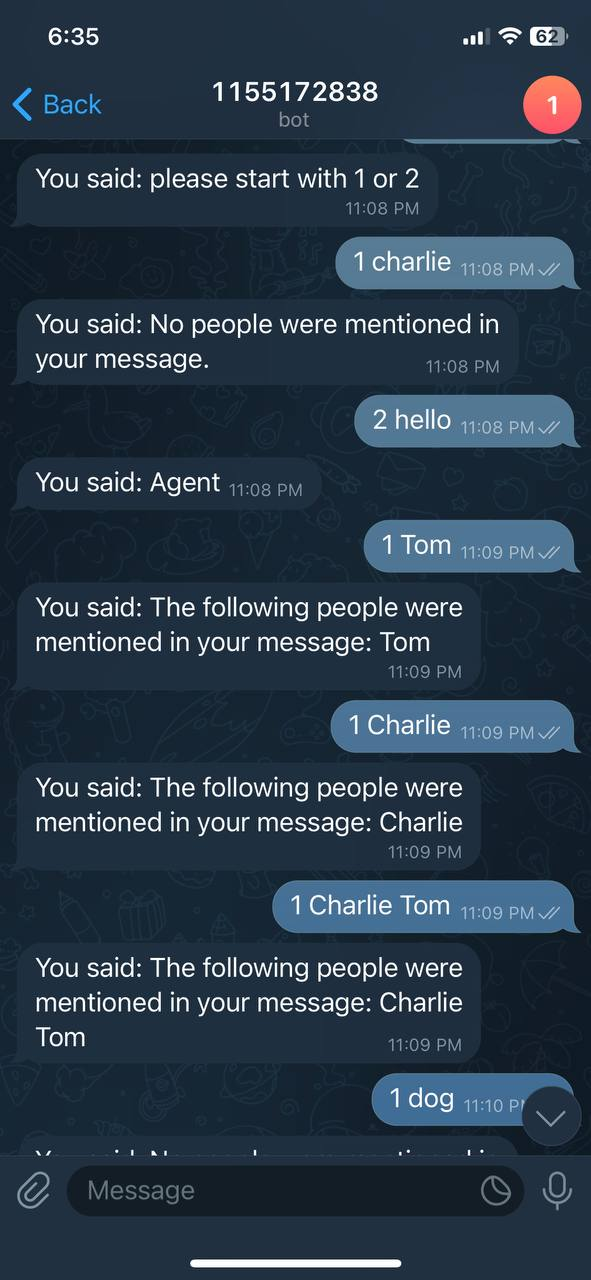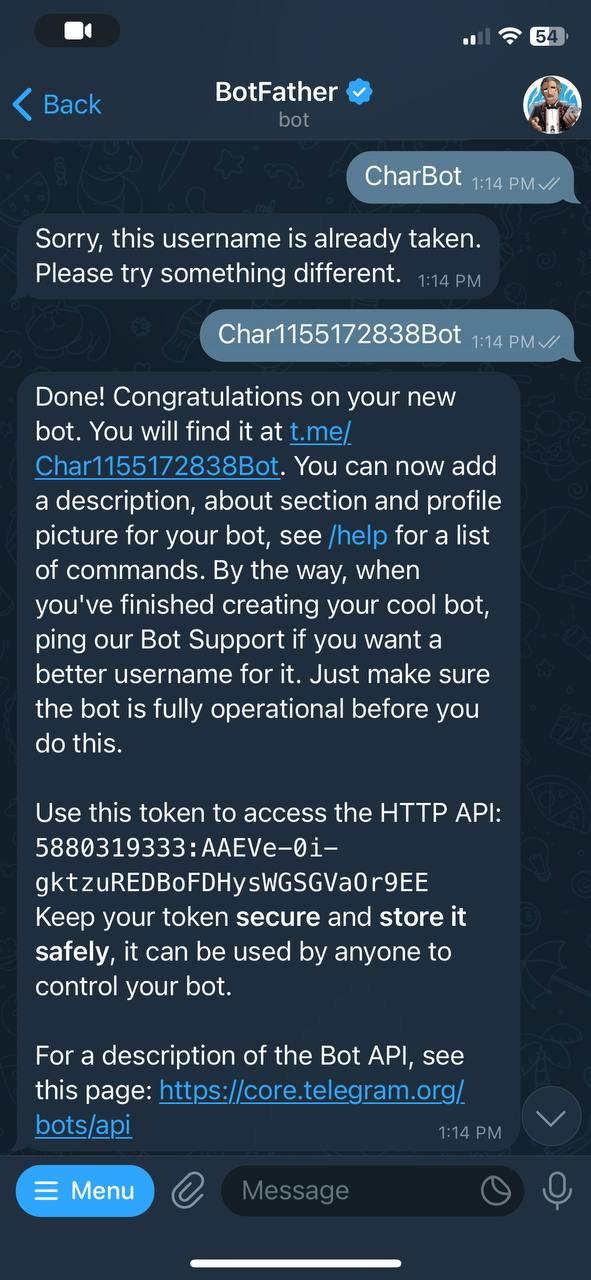